In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv(".\student-mat.csv", delimiter=';')

# 1. Descriptive Statistics
data.describe().round(2)


ModuleNotFoundError: No module named 'pandas'

In [313]:
# 1. Descriptive Statistics
data.median(numeric_only=True)

age           17.0
Medu           3.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       4.0
G1            11.0
G2            11.0
G3            11.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

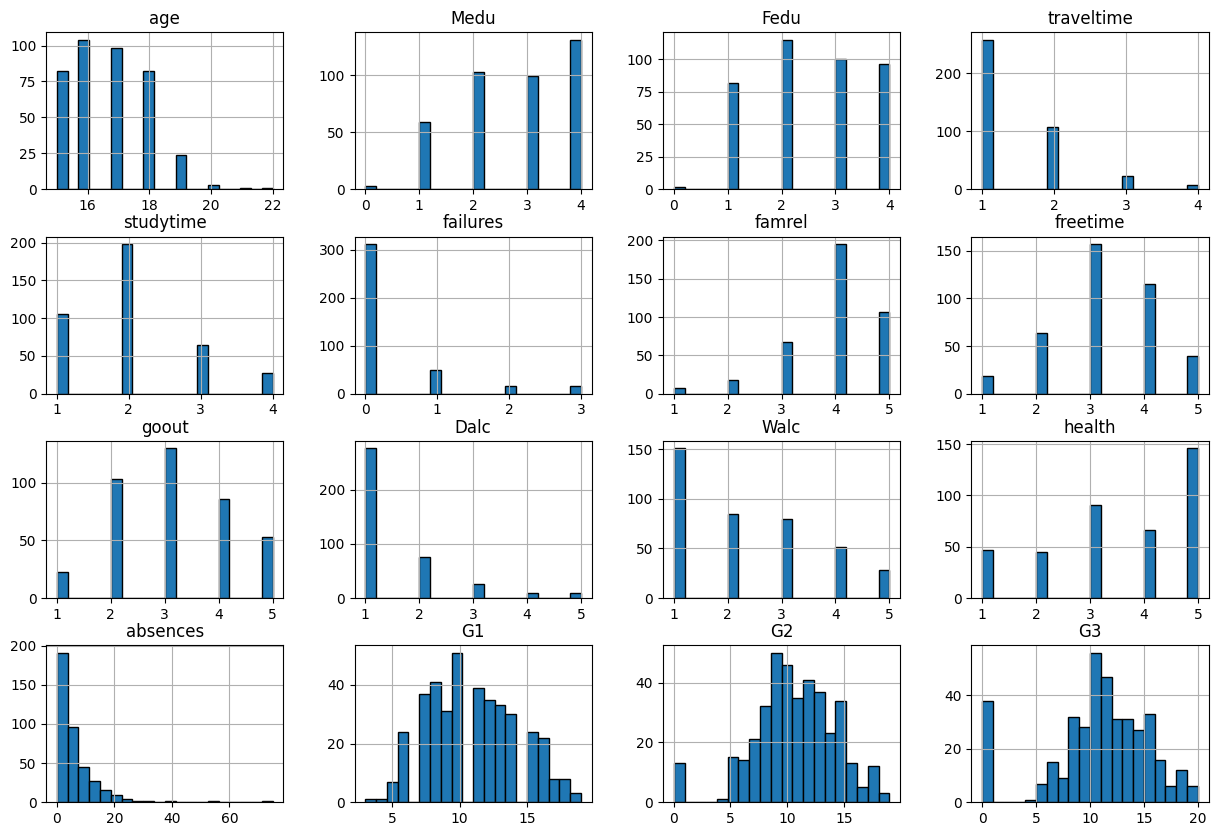

In [314]:
# 1. Descriptive Statistics
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.show

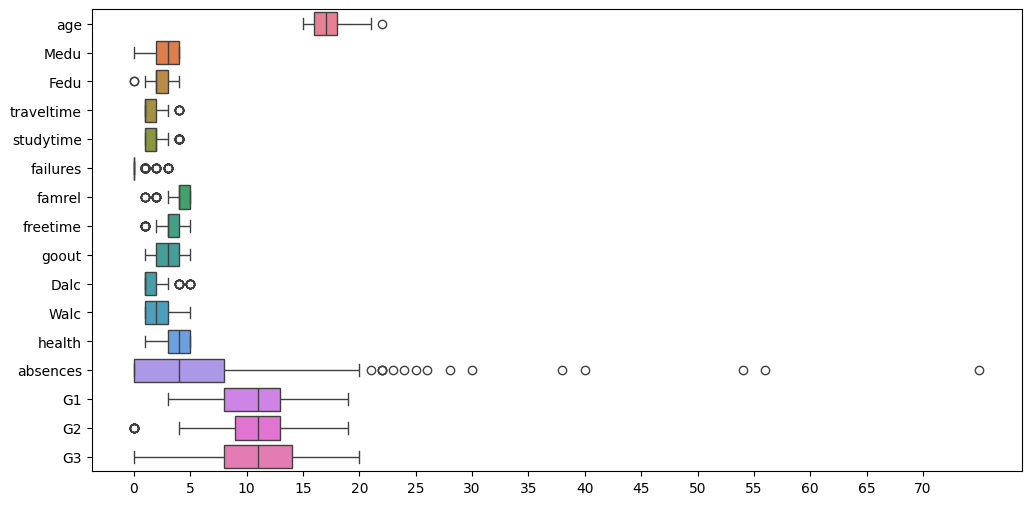

In [315]:
# 1. Descriptive Statistics

# Figure size
plt.figure(figsize=(12, 6))

# Filter data by type
numerical_data = data.select_dtypes(include=['number'])

# Create boxplot
sns.boxplot(data=numerical_data, orient='h')

# x-axis labels
plt.xticks(np.arange(numerical_data.min().min(), numerical_data.max().max(), step=5))

plt.show()

In [316]:
# 2. Data Preprocessing Output

# Select data types that are categorical/objects (not ints)
categorical_data = data.select_dtypes(include=['object']).columns

# Create encoder
encoder = OneHotEncoder(sparse_output=False)

# Encodes data
encoded_data = encoder.fit_transform(data[categorical_data])

# Creates dataframe so we can add it back to the data later
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_data))

# Print the encoded data to show successful encoding
display(encoded_data)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [317]:
# 2. Data Preprocessing Output

# Drop original categorical data and replace with the encoded data
data_encoded = data.drop(columns=categorical_data).join(encoded_df)

# Print new data after join of encoded categorical variables
print(data_encoded)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0        4     1  

In [428]:
#3. Model Training & Performance Output

# Split Data into target variable (G3) and features
X = data_encoded.drop(columns=['G3']) #features
y = data_encoded['G3']  # target

# Put data into training and testing 80-20 (random split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict based on the random test set
y_pred = model.predict(X_test)

# Evaluate model based on mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Evaluate model based on R squared score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4.05
R^2 Score: 0.79


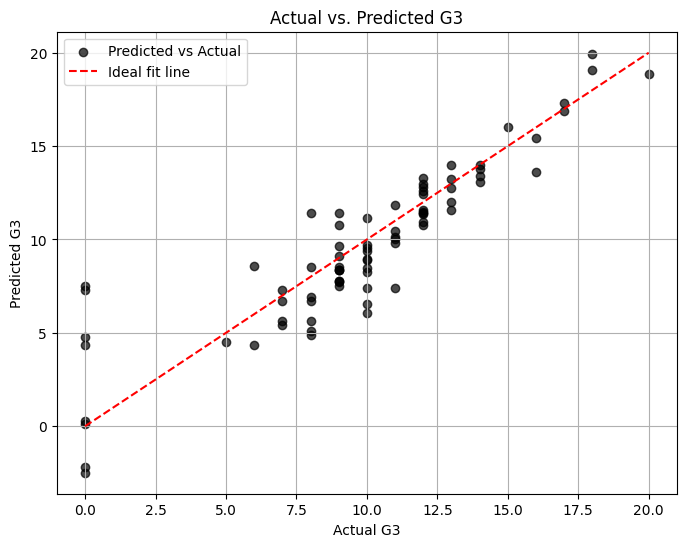

In [429]:
#4. Visualizations of Model Performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='black', label='Predicted vs Actual')
# Plot line where actual equals predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal fit line')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.title("Actual vs. Predicted G3")
plt.legend()
plt.show()